In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy.eval import has_bare_variable_reference

In [2]:
dataset_2020_Q1 = pd.read_csv(r"H:\My Drive\02. Coursera\01. Google Data Analytics\09. Complete a Case Study\Case study\Case_study_1\Divvy_Trips_2020_Q1.csv")

In [3]:
dataset_2020_Q1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member


In [4]:
dataset_2020_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


In [5]:
# Convert started_at and ended_at to datetime
dataset_2020_Q1['started_at'] = pd.to_datetime(dataset_2020_Q1['started_at'])
dataset_2020_Q1['ended_at'] = pd.to_datetime(dataset_2020_Q1['ended_at'])
dataset_2020_Q1['ride_duration'] = (dataset_2020_Q1['ended_at'] - dataset_2020_Q1['started_at']).dt.total_seconds()/60

In [6]:
dataset_2020_Q1.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      1
end_station_id        1
start_lat             0
start_lng             0
end_lat               1
end_lng               1
member_casual         0
ride_duration         0
dtype: int64

In [7]:
dataset_2020_Q1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,7.516667
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,3.716667
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2.850000
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,8.816667
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,5.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual,0.016667
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member,48.133333
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual,25.850000
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member,10.550000


In [8]:
dataset_2020_Q1.groupby('member_casual').agg({'ride_duration': 'sum'}).round(2)
dataset_2020_Q1.groupby('member_casual').agg({'ride_duration': 'mean'}).round(2)

,ride_duration
member_casual,
casual,95.78
member,12.68


In [9]:
print(f"Thời gian duy chuyển của mamber nhiều hơn casual {(4797108-4643542)/3600} HOURS")

Thời gian duy chuyển của mamber nhiều hơn casual 42.657222222222224 HOURS


In [10]:
dataset_2020_Q1['ride_duration'].mean()

22.115104699838593

In [11]:
dataset_2020_Q1.groupby('rideable_type').agg({'ride_duration': 'sum'}).round(2)

,ride_duration
rideable_type,
docked_bike,9440650.7


In [12]:
# Tinhs khoản cách giữa 2 tọa độ để tính quãng đường người thuê xe di chuyển
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371*c  # Khoảng cách tính bằng km 6371 là bán kính trái đất

In [13]:
dataset_2020_Q1['Distance'] = dataset_2020_Q1.apply(
    lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']),
    axis=1
).round(2)


In [14]:
dataset_2020_Q1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,Distance
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,7.516667,1.74
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,3.716667,0.83
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2.850000,0.62
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,8.816667,1.23
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,5.533333,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual,0.016667,0.00
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member,48.133333,6.91
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual,25.850000,3.06
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member,10.550000,1.19


In [15]:
dataset_2020_Q1.groupby('member_casual').agg({'Distance':'sum'}).round(2)


,Distance
member_casual,
casual,94383.86
member,695459.85


In [16]:
dataset_2020_Q1.groupby('member_casual').agg({'Distance':'mean'}).round(2)

,Distance
member_casual,
casual,1.95
member,1.84


In [17]:
dataset_2020_Q1['member_casual'].value_counts()

member_casual
member    378407
casual     48480
Name: count, dtype: int64

In [18]:
dataset_2020_Q1['day_of_week_start']=dataset_2020_Q1['started_at'].dt.dayofweek

In [19]:
dataset_2020_Q1['day_of_week_end'] = dataset_2020_Q1['ended_at'].dt.dayofweek

In [20]:
dataset_2020_Q1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,Distance,day_of_week_start,day_of_week_end
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,7.516667,1.74,1,1
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,3.716667,0.83,3,3
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2.850000,0.62,3,3
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,8.816667,1.23,0,0
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,5.533333,0.78,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual,0.016667,0.00,1,1
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member,48.133333,6.91,5,5
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual,25.850000,3.06,6,6
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member,10.550000,1.19,5,5


In [24]:
dataset_2020_Q1['number_day_use_bike']=dataset_2020_Q1['ended_at']-dataset_2020_Q1['started_at']

In [25]:
dataset_2020_Q1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,Distance,day_of_week_start,day_of_week_end,number_day_use_bike
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,7.516667,1.74,1,1,0 days 00:07:31
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,3.716667,0.83,3,3,0 days 00:03:43
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2.850000,0.62,3,3,0 days 00:02:51
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,8.816667,1.23,0,0,0 days 00:08:49
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,5.533333,0.78,3,3,0 days 00:05:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual,0.016667,0.00,1,1,0 days 00:00:01
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member,48.133333,6.91,5,5,0 days 00:48:08
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual,25.850000,3.06,6,6,0 days 00:25:51
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member,10.550000,1.19,5,5,0 days 00:10:33


In [26]:
dataset_2020_Q1['number_day_use_bike'].value_counts()

number_day_use_bike
0 days 00:00:02    2046
0 days 00:00:03    1106
0 days 00:04:47     611
0 days 00:05:38     610
0 days 00:05:18     604
                   ... 
0 days 01:58:24       1
0 days 11:08:42       1
0 days 01:46:55       1
0 days 09:03:16       1
0 days 01:48:51       1
Name: count, Length: 8361, dtype: int64

In [28]:
dataset_2020_Q1['started_at'] = pd.to_datetime(dataset_2020_Q1['started_at'])
dataset_2020_Q1['day_of_week_start'] = dataset_2020_Q1['started_at'].dt.day_name()
dataset_2020_Q1['ended_at'] = pd.to_datetime(dataset_2020_Q1['ended_at'])
dataset_2020_Q1['day_of_week_end'] = dataset_2020_Q1['ended_at'].dt.day_name()

In [29]:
dataset_2020_Q1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,Distance,day_of_week_start,day_of_week_end,number_day_use_bike
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,7.516667,1.74,Tuesday,Tuesday,0 days 00:07:31
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,3.716667,0.83,Thursday,Thursday,0 days 00:03:43
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2.850000,0.62,Thursday,Thursday,0 days 00:02:51
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,8.816667,1.23,Monday,Monday,0 days 00:08:49
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,5.533333,0.78,Thursday,Thursday,0 days 00:05:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual,0.016667,0.00,Tuesday,Tuesday,0 days 00:00:01
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member,48.133333,6.91,Saturday,Saturday,0 days 00:48:08
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual,25.850000,3.06,Sunday,Sunday,0 days 00:25:51
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member,10.550000,1.19,Saturday,Saturday,0 days 00:10:33


In [32]:
dataset_2020_Q1['day_of_week_start'].value_counts().sort_values(ascending=False).head(7)

day_of_week_start
Tuesday      74961
Wednesday    69911
Monday       66778
Thursday     66140
Friday       60663
Sunday       50850
Saturday     37584
Name: count, dtype: int64

In [43]:


# Ensure necessary libraries are loaded

# Calculate ride_length in minutes
dataset_2020_Q1['ride_length'] = (dataset_2020_Q1['ended_at'] - dataset_2020_Q1['started_at']).dt.total_seconds() / 60

# Extract day of the week
dataset_2020_Q1['day_of_week'] = dataset_2020_Q1['started_at'].dt.day_name()

# Pivot Table 1: Average ride_length for members and casual riders
pivot_avg_ride_length = dataset_2020_Q1.pivot_table(
    values='ride_length',
    index='member_casual',
    aggfunc='mean'
)

# Pivot Table 2: Average ride_length by day_of_week and member_casual
pivot_avg_ride_length_by_day = dataset_2020_Q1.pivot_table(
    values='ride_length',
    index='member_casual',
    columns='day_of_week',
    aggfunc='mean'
)

# Pivot Table 3: Count of trips by day_of_week and member_casual
pivot_count_rides_by_day = dataset_2020_Q1.pivot_table(
    values='ride_id',
    index='member_casual',
    columns='day_of_week',
    aggfunc='count'
)

Average Ride Length by Membership Type:
               ride_length
member_casual             
casual           95.782644
member           12.677113

Average Ride Length by Day of Week:
day_of_week        Friday     Monday    Saturday     Sunday    Thursday  \
member_casual                                                             
casual         118.307074  73.896674  100.285934  95.176108  125.859612   
member          12.622069  12.977143   15.499821  15.822336   11.553876   

day_of_week      Tuesday  Wednesday  
member_casual                        
casual         84.636541  74.994387  
member         11.533872  11.658941  

Ride Count by Day of Week:
day_of_week    Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
member_casual                                                                
casual           5167    4855      7480   14886      4895     5264       5933
member          55496   61923     30104   35964     61245    69697      63978


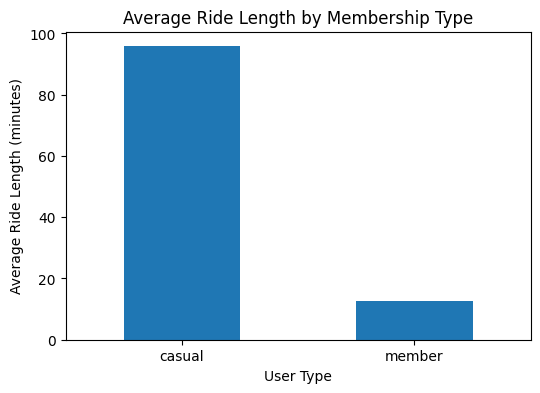

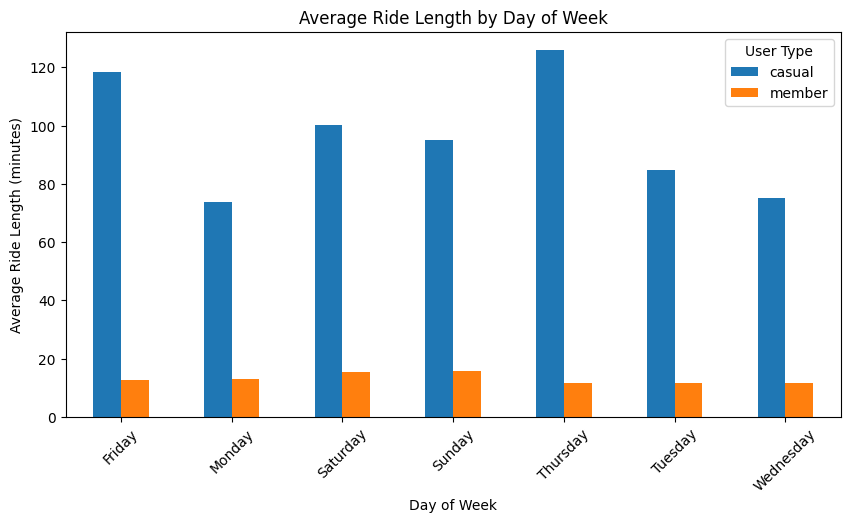

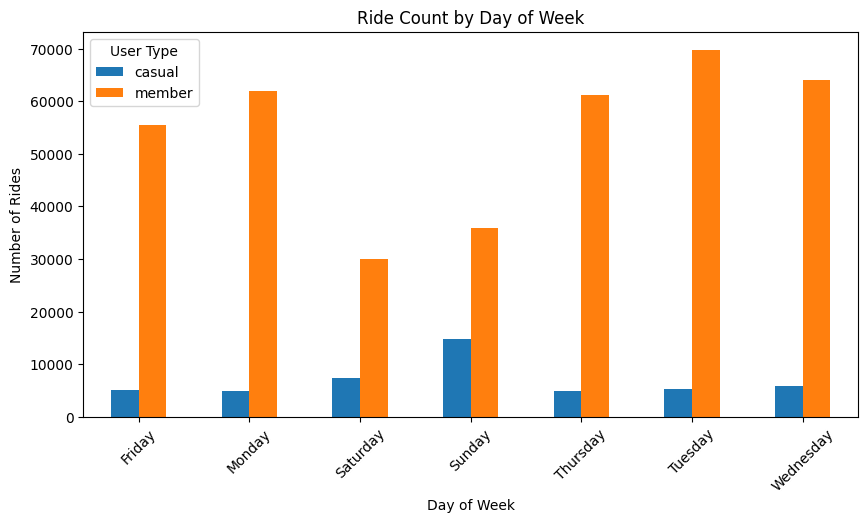

In [44]:
# Re-attempt to display pivot tables using a different method (without ace_tools)
import matplotlib.pyplot as plt

# Display Pivot Table 1: Average Ride Length by Membership Type
print("Average Ride Length by Membership Type:")
print(pivot_avg_ride_length)

# Display Pivot Table 2: Average Ride Length by Day of Week
print("\nAverage Ride Length by Day of Week:")
print(pivot_avg_ride_length_by_day)

# Display Pivot Table 3: Ride Count by Day of Week
print("\nRide Count by Day of Week:")
print(pivot_count_rides_by_day)

# Plot Average Ride Length by Membership Type
pivot_avg_ride_length.plot(kind='bar', figsize=(6,4), legend=False)
plt.title("Average Ride Length by Membership Type")
plt.xlabel("User Type")
plt.ylabel("Average Ride Length (minutes)")
plt.xticks(rotation=0)
plt.show()

# Plot Average Ride Length by Day of the Week
pivot_avg_ride_length_by_day.T.plot(kind='bar', figsize=(10,5))
plt.title("Average Ride Length by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Ride Length (minutes)")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()

# Plot Ride Count by Day of the Week
pivot_count_rides_by_day.T.plot(kind='bar', figsize=(10,5))
plt.title("Ride Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()


In [45]:
# Xuất dữ liệu ra file CSV sau khi tính khoảng cách
output_file_path = r"H:\My Drive\02. Coursera\01. Google Data Analytics\09. Complete a Case Study\Case study\Case_study_1\dataset_2020_Q1_after_processes.csv"
dataset_2020_Q1.to_csv(output_file_path, index=False)

# Cung cấp link tải file cho người dùng
output_file_path


'H:\\My Drive\\02. Coursera\\01. Google Data Analytics\\09. Complete a Case Study\\Case study\\Case_study_1\\dataset_2020_Q1_after_processes.csv'